#### Random Forest Predictive Model

##### Model 1 Baseline 

In [96]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report
from sklearn.preprocessing import OneHotEncoder, LabelEncoder

DataFramePossiblyBiased = pd.read_csv('/Users/arend/Desktop/CHD Prediction/DataFramePossiblyBiased.csv')

# Gather non-numerical features for LabelEncoder (binary features) and OneHotEncoder (multiclass features) to make numerical
multiclass_features = ['Smoker', 'Ethnicity', 'Age', 'Income']
binary_features = ['PhysicalActivity', 'HadDepressiveDisorder', 'BadMentalState', 'DrinkingAlcohol30Days', 'UrbanOrRural', 'Sex']

# Apply OneHotEncoder to multiclass features
X = pd.get_dummies(DataFramePossiblyBiased, columns=multiclass_features, drop_first=True)

# Apply LabelEncoder to binary features
label_encoder = LabelEncoder()
for feature in binary_features:
    X[feature] = label_encoder.fit_transform(X[feature])

# Split the features into independent features (X) and dependent feature (y)
X = X.drop('CHD', axis=1)
y = DataFramePossiblyBiased['CHD']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42) # (:

# Initialize the Random Forest Classifier
rf_model = RandomForestClassifier(random_state=42)

# Fit the model to the training data
rf_model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = rf_model.predict(X_test)

# Evaluate the model
print(classification_report(y_test, y_pred))

KeyboardInterrupt: 

##### Model 2 with class weights for imbalanced target feature (not after removing imbalance manually)

In [111]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report
from sklearn.preprocessing import OneHotEncoder, LabelEncoder

DataFramePossiblyBiased = pd.read_csv('/Users/arend/Desktop/CHD Prediction/DataFramePossiblyBiased.csv')

# Gather non-numerical features for LabelEncoder (binary features) and OneHotEncoder (multiclass features) to make numerical
multiclass_features = ['Smoker', 'Ethnicity', 'Age', 'Income']
binary_features = ['PhysicalActivity', 'HadDepressiveDisorder', 'BadMentalState', 'DrinkingAlcohol30Days', 'UrbanOrRural', 'Sex']

# Apply OneHotEncoder to multiclass features
X = pd.get_dummies(DataFramePossiblyBiased, columns=multiclass_features, drop_first=True)

# Apply LabelEncoder to binary features
label_encoder = LabelEncoder()
for feature in binary_features:
    X[feature] = label_encoder.fit_transform(X[feature])

# Split the features into independent features (X) and dependent feature (y)
X = X.drop('CHD', axis=1)
y = DataFramePossiblyBiased['CHD']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42) # (:

# Class weights for imbalanced data (ADJUST RATIO?)
class_weights = {'No': 1, 'Yes': 10}

# Initialize the Random Forest Classifier with class weights
rf_model = RandomForestClassifier(class_weight=class_weights, random_state=42)

# Fit the model to the training data
rf_model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = rf_model.predict(X_test)

# Evaluate the model
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

          No       0.85      0.98      0.91     10354
         Yes       0.38      0.08      0.13      1967

    accuracy                           0.83     12321
   macro avg       0.61      0.53      0.52     12321
weighted avg       0.77      0.83      0.78     12321



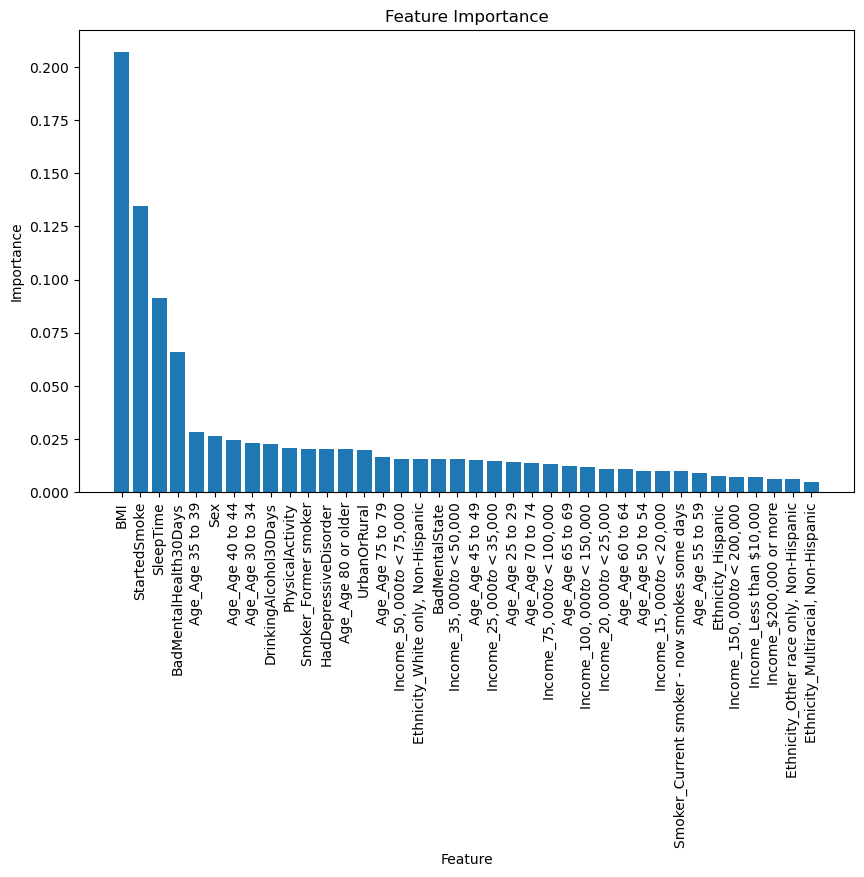

In [112]:
import matplotlib.pyplot as plt

# Get feature importances
importances = rf_model.feature_importances_

# Get feature names
feature_names = X.columns

# Sort feature importances in descending order
indices = importances.argsort()[::-1]

# Plot
plt.figure(figsize=(10, 6))
plt.title("Feature Importance")
plt.bar(range(X.shape[1]), importances[indices], align="center")
plt.xticks(range(X.shape[1]), feature_names[indices], rotation=90)
plt.xlabel("Feature")
plt.ylabel("Importance")
plt.show()

##### Model 3 with oversampling and weight for imbalanced target feature (not after removing imbalance manually)

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report
from sklearn.preprocessing import OneHotEncoder, LabelEncoder
from imblearn.over_sampling import RandomOverSampler

DataFramePossiblyBiased = pd.read_csv('/Users/arend/Desktop/CHD Prediction/DataFramePossiblyBiased.csv')

# Gather non-numerical features for LabelEncoder (binary features) and OneHotEncoder (multiclass features) to make numerical
multiclass_features = ['Smoker', 'Ethnicity', 'Age', 'Income']
binary_features = ['PhysicalActivity', 'HadDepressiveDisorder', 'BadMentalState', 'DrinkingAlcohol30Days', 'UrbanOrRural', 'Sex']

# Apply OneHotEncoder to multiclass features
X = pd.get_dummies(DataFramePossiblyBiased, columns=multiclass_features, drop_first=True)

# Apply LabelEncoder to binary features
label_encoder = LabelEncoder()
for feature in binary_features:
    X[feature] = label_encoder.fit_transform(X[feature])

# Split the features into independent features (X) and dependent feature (y)
X = X.drop('CHD', axis=1)
y = DataFramePossiblyBiased['CHD']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42) # (:

# Apply oversampling to the training data
oversampler = RandomOverSampler(sampling_strategy='minority', random_state=42)
X_train_resampled, y_train_resampled = oversampler.fit_resample(X_train, y_train)

# Class weights for imbalanced target feature (ADJUST RATIO?)
class_weights = {'No': 1, 'Yes': 10}

# Initialize the Random Forest Classifier with class weights
rf_model = RandomForestClassifier(class_weight=class_weights, random_state=42)

# Fit the model to the resampled training data
rf_model.fit(X_train_resampled, y_train_resampled)

# Make predictions on the test set
y_pred = rf_model.predict(X_test)

# Evaluate the model
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

          No       0.86      0.93      0.89     10354
         Yes       0.36      0.19      0.25      1967

    accuracy                           0.82     12321
   macro avg       0.61      0.56      0.57     12321
weighted avg       0.78      0.82      0.79     12321



##### Evaluate Model on dataset more true distributed to the population in general

In [ ]:
import pandas as pd
from sklearn.metrics import classification_report

DataFrameMoreTrueDistribution = pd.read_csv('/Users/arend/Desktop/CHD Prediction/DataFrameMoreTrueDistribution.csv')

# Gather non-numerical features for LabelEncoder (binary features) and OneHotEncoder (multiclass features) to make numerical
multiclass_features = ['Smoker', 'Ethnicity', 'Age', 'Income']
binary_features = ['PhysicalActivity', 'HadDepressiveDisorder', 'BadMentalState', 'DrinkingAlcohol30Days', 'UrbanOrRural', 'Sex']

# Apply OneHotEncoder to multiclass features
X = pd.get_dummies(DataFrameMoreTrueDistribution, columns=multiclass_features, drop_first=True)

# Apply LabelEncoder to binary features
label_encoder = LabelEncoder()
for feature in binary_features:
    X[feature] = label_encoder.fit_transform(X[feature])

# Split the features into independent features (X) and dependent feature (y)
X = X.drop('CHD', axis=1)
y = DataFrameMoreTrueDistribution['CHD']

# Make predictions using the DataFramePossiblyBiased trained model
y_pred = rf_model.predict(X)

# Evaluate the predictions
print("Evaluation on the DataFrameMoreTrueDistribution dataset:")
print(classification_report(y, y_pred))

Evaluation on the DataFrameMoreTrueDistribution dataset:
              precision    recall  f1-score   support

          No       0.98      0.98      0.98    101926
         Yes       0.82      0.81      0.82      9679

    accuracy                           0.97    111605
   macro avg       0.90      0.90      0.90    111605
weighted avg       0.97      0.97      0.97    111605



##### Performance Visualisation (Different Random Forest Models)

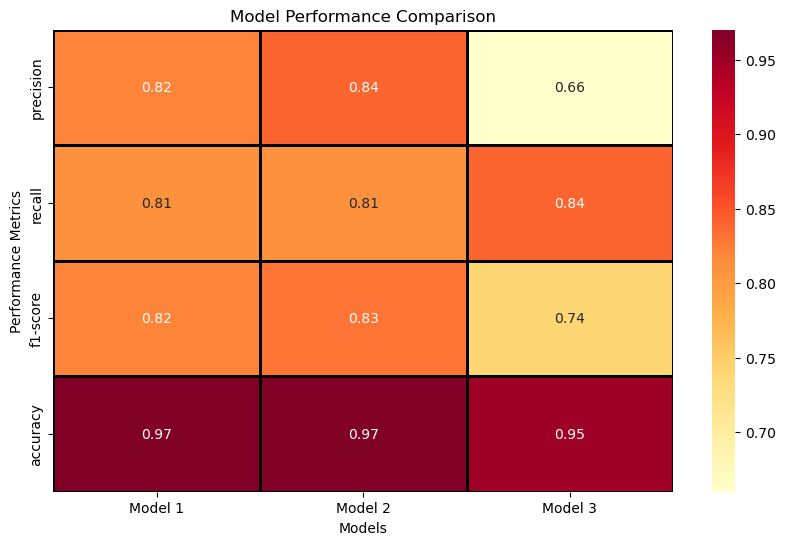

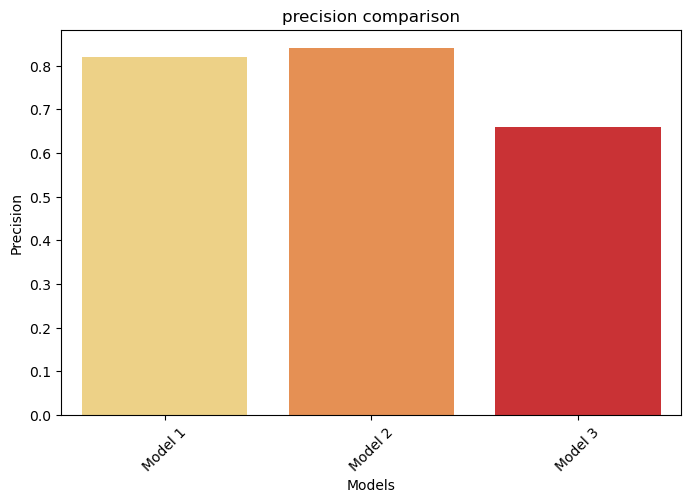

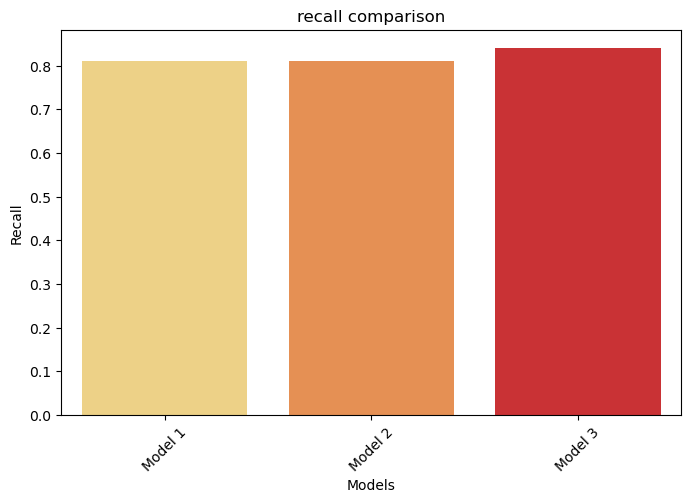

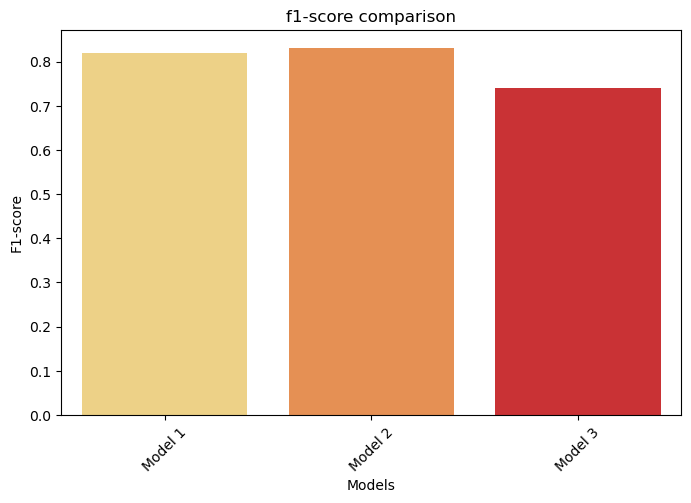

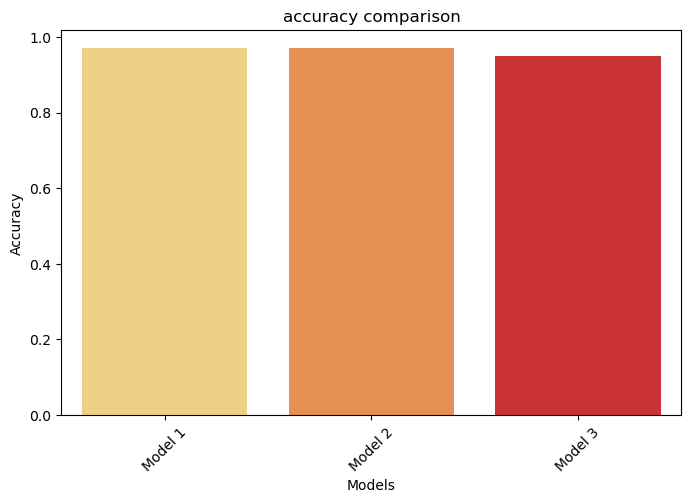

In [108]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# Model performances
model_performances = {
    'Model 1': {'precision': 0.82, 'recall': 0.81, 'f1-score': 0.82, 'accuracy': 0.97},
    'Model 2': {'precision': 0.84, 'recall': 0.81, 'f1-score': 0.83, 'accuracy': 0.97},
    'Model 3': {'precision': 0.66, 'recall': 0.84, 'f1-score': 0.74, 'accuracy': 0.95}
}

# Model performances to DataFrame 
performance_DataFrame = pd.DataFrame(model_performances).T

# Plot heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(performance_DataFrame.T, annot=True, cmap='YlOrRd', fmt='.2f', linewidths=1, linecolor='black')
plt.title('Model Performance Comparison')
plt.xlabel('Models')
plt.ylabel('Performance Metrics')
plt.show()


# Plot bar plots
metrics = performance_DataFrame.columns
for metric in metrics:
    plt.figure(figsize=(8, 5))
    sns.barplot(x=performance_DataFrame.index, y=performance_DataFrame[metric], palette='YlOrRd')
    plt.title(f'{metric} comparison')
    plt.xlabel('Models')
    plt.ylabel(metric.capitalize())
    plt.xticks(rotation=45)
    plt.show()

#### Neural Networks (Multi-layer Perceptron)

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import classification_report
from sklearn.preprocessing import OneHotEncoder, LabelEncoder
from imblearn.over_sampling import RandomOverSampler

DataFramePossiblyBiased = pd.read_csv('/Users/arend/Desktop/CHD Prediction/DataFramePossiblyBiased.csv')

# Gather non-numerical features for LabelEncoder (binary features) and OneHotEncoder (multiclass features) to make numerical
multiclass_features = ['Smoker', 'Ethnicity', 'Age', 'Income']
binary_features = ['PhysicalActivity', 'HadDepressiveDisorder', 'BadMentalState', 'DrinkingAlcohol30Days', 'UrbanOrRural', 'Sex']

# Apply OneHotEncoder to multiclass features
X = pd.get_dummies(DataFramePossiblyBiased, columns=multiclass_features, drop_first=True)

# Apply LabelEncoder to binary features
label_encoder = LabelEncoder()
for feature in binary_features:
    X[feature] = label_encoder.fit_transform(X[feature])

# Split the features into independent features (X) and dependent feature (y)
X = X.drop('CHD', axis=1)
y = DataFramePossiblyBiased['CHD']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Apply oversampling to the training data
oversampler = RandomOverSampler(sampling_strategy='minority', random_state=42)
X_train_resampled, y_train_resampled = oversampler.fit_resample(X_train, y_train)

# Initialize the Multi-layer Perceptron (MLP) Classifier
mlp_model = MLPClassifier(random_state=42)

# Fit the model to the resampled training data
mlp_model.fit(X_train_resampled, y_train_resampled)

# Make predictions on the test set
y_pred = mlp_model.predict(X_test)

# Evaluate the model
print(classification_report(y_test, y_pred))

/Users/arend/anaconda3/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


              precision    recall  f1-score   support

          No       0.92      0.67      0.77     10354
         Yes       0.28      0.70      0.40      1967

    accuracy                           0.67     12321
   macro avg       0.60      0.68      0.59     12321
weighted avg       0.82      0.67      0.71     12321



##### Evaluating Model on dataset more true distributed to the population in general

In [ ]:
import pandas as pd
from sklearn.metrics import classification_report

DataFrameMoreTrueDistribution = pd.read_csv('/Users/arend/Desktop/CHD Prediction/DataFrameMoreTrueDistribution.csv')

# Gather non-numerical features for LabelEncoder (binary features) and OneHotEncoder (multiclass features) to make numerical
multiclass_features = ['Smoker', 'Ethnicity', 'Age', 'Income']
binary_features = ['PhysicalActivity', 'HadDepressiveDisorder', 'BadMentalState', 'DrinkingAlcohol30Days', 'UrbanOrRural', 'Sex']

# Apply OneHotEncoder to multiclass features
X_DataFrameMoreTrueDistribution = pd.get_dummies(DataFrameMoreTrueDistribution, columns=multiclass_features, drop_first=True)

# Apply LabelEncoder to binary features
label_encoder = LabelEncoder()
for feature in binary_features:
    X_DataFrameMoreTrueDistribution[feature] = label_encoder.fit_transform(X_DataFrameMoreTrueDistribution[feature])

# Split the features into independent features (X) and dependent feature (y)
X_DataFrameMoreTrueDistribution = X_DataFrameMoreTrueDistribution.drop('CHD', axis=1)
y_DataFrameMoreTrueDistribution = DataFrameMoreTrueDistribution['CHD']

# Make predictions using the DataFramePossiblyBiased trained MLP model
y_pred_DataFrameMoreTrueDistribution = mlp_model.predict(X_DataFrameMoreTrueDistribution)

# Evaluate the predictions
print("Evaluation on the DataFrameMoreTrueDistribution dataframe (DataFrameMoreTrueDistribution):")
print(classification_report(y_DataFrameMoreTrueDistribution, y_pred_DataFrameMoreTrueDistribution))

Evaluation on the DataFrameMoreTrueDistribution dataframe (DataFrameMoreTrueDistribution):
              precision    recall  f1-score   support

          No       0.97      0.68      0.80    101926
         Yes       0.19      0.80      0.31      9679

    accuracy                           0.69    111605
   macro avg       0.58      0.74      0.55    111605
weighted avg       0.91      0.69      0.75    111605



#### Support Vector Machines (SVM)

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import classification_report
from sklearn.preprocessing import OneHotEncoder, LabelEncoder

DataFramePossiblyBiased = pd.read_csv('/Users/arend/Desktop/CHD Prediction/DataFramePossiblyBiased.csv')

# Gather non-numerical features for LabelEncoder (binary features) and OneHotEncoder (multiclass features) to make numerical
multiclass_features = ['Smoker', 'Ethnicity', 'Age', 'Income']
binary_features = ['PhysicalActivity', 'HadDepressiveDisorder', 'BadMentalState', 'DrinkingAlcohol30Days', 'UrbanOrRural', 'Sex']

# Apply OneHotEncoder to multiclass features
X = pd.get_dummies(DataFramePossiblyBiased, columns=multiclass_features, drop_first=True)

# Apply LabelEncoder to binary features
label_encoder = LabelEncoder()
for feature in binary_features:
    X[feature] = label_encoder.fit_transform(X[feature])

# Split the features into independent features (X) and dependent feature (y)
X = X.drop('CHD', axis=1)
y = DataFramePossiblyBiased['CHD']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize the Support Vector Machine (SVM) Classifier
svm_model = SVC(class_weight='balanced', random_state=42)

# Fit the model to the training data
svm_model.fit(X_train, y_train)

# Make predictions on the test set
y_pred_svm = svm_model.predict(X_test)

# Evaluate the SVM model
print("Support Vector Machine (SVM) Classifier:")
print(classification_report(y_test, y_pred_svm))

Support Vector Machine (SVM) Classifier:
              precision    recall  f1-score   support

          No       0.94      0.61      0.74     10354
         Yes       0.28      0.79      0.41      1967

    accuracy                           0.64     12321
   macro avg       0.61      0.70      0.58     12321
weighted avg       0.83      0.64      0.69     12321



##### Evaluating Model on dataset more true distributed to the population in general

In [ ]:
import pandas as pd
from sklearn.metrics import classification_report

DataFrameMoreTrueDistribution = pd.read_csv('/Users/arend/Desktop/CHD Prediction/DataFrameMoreTrueDistribution.csv')

# Gather non-numerical features for LabelEncoder (binary features) and OneHotEncoder (multiclass features) to make numerical
multiclass_features = ['Smoker', 'Ethnicity', 'Age', 'Income']
binary_features = ['PhysicalActivity', 'HadDepressiveDisorder', 'BadMentalState', 'DrinkingAlcohol30Days', 'UrbanOrRural', 'Sex']

# Apply OneHotEncoder to multiclass features
X_DataFrameMoreTrueDistribution = pd.get_dummies(DataFrameMoreTrueDistribution, columns=multiclass_features, drop_first=True)

# Apply LabelEncoder to binary features
label_encoder = LabelEncoder()
for feature in binary_features:
    X_DataFrameMoreTrueDistribution[feature] = label_encoder.fit_transform(X_DataFrameMoreTrueDistribution[feature])

# Split the features into independent features (X) and dependent feature (y)
X_DataFrameMoreTrueDistribution = X_DataFrameMoreTrueDistribution.drop('CHD', axis=1)
y_DataFrameMoreTrueDistribution = DataFrameMoreTrueDistribution['CHD']

# Make predictions using the DataFramePossiblyBiased trained SVM model
y_pred_DataFrameMoreTrueDistribution_svm = svm_model.predict(X_DataFrameMoreTrueDistribution)

# Evaluate the predictions
print("Evaluation on the DataFrameMoreTrueDistribution dataframe (DataFrameMoreTrueDistribution):")
print(classification_report(y_DataFrameMoreTrueDistribution, y_pred_DataFrameMoreTrueDistribution_svm))

Evaluation on the DataFrameMoreTrueDistribution dataframe (DataFrameMoreTrueDistribution):
              precision    recall  f1-score   support

          No       0.97      0.61      0.75    101926
         Yes       0.16      0.80      0.27      9679

    accuracy                           0.63    111605
   macro avg       0.57      0.70      0.51    111605
weighted avg       0.90      0.63      0.71    111605



#### Performance Visualisation (Different AI methods)

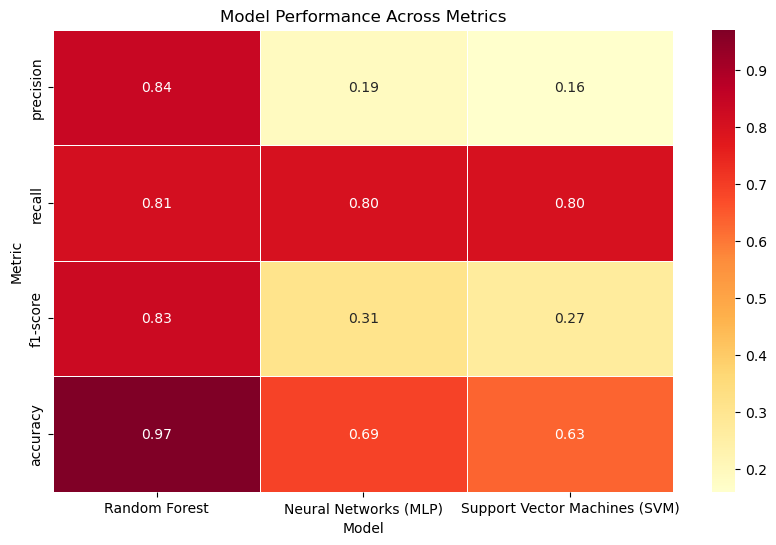

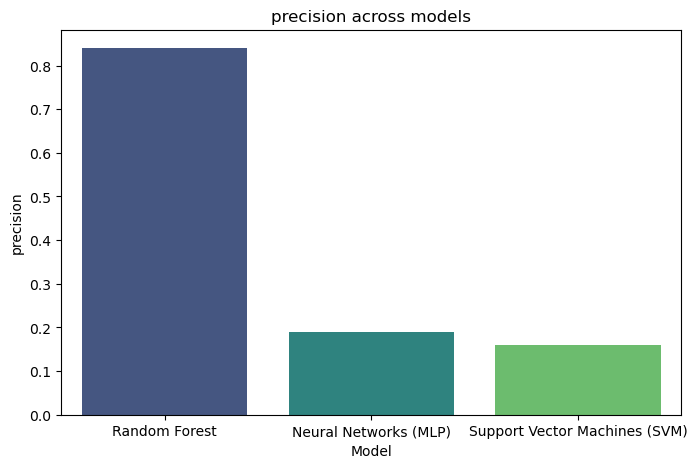

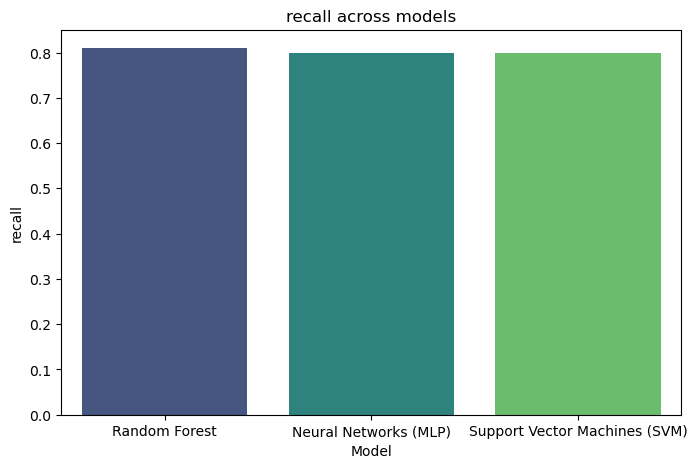

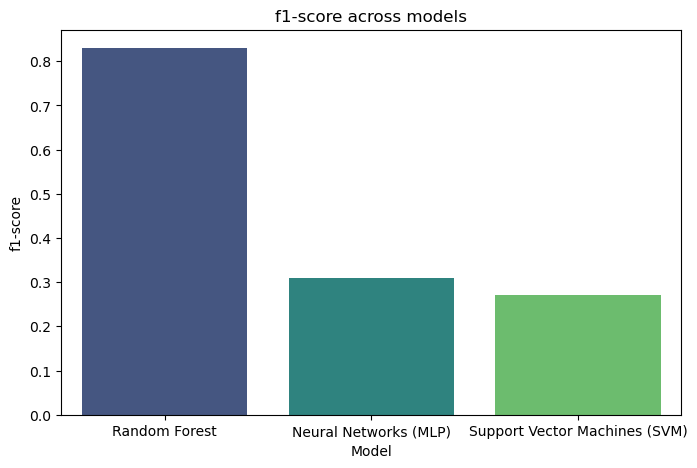

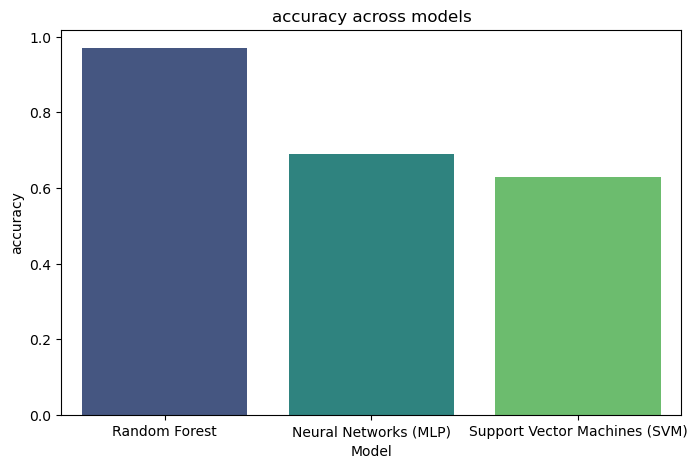

In [110]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# Model outputs
model_outputs = {
    'Random Forest': {'precision': 0.84, 'recall': 0.81, 'f1-score': 0.83, 'accuracy': 0.97},
    'Neural Networks (MLP)': {'precision': 0.19, 'recall': 0.80, 'f1-score': 0.31, 'accuracy': 0.69},
    'Support Vector Machines (SVM)': {'precision': 0.16, 'recall': 0.80, 'f1-score': 0.27, 'accuracy': 0.63}
}

#  Model performances to DataFrame 
DataFrame = pd.DataFrame(model_outputs)

# Plot heatmap 
plt.figure(figsize=(10, 6))
sns.heatmap(DataFrame, annot=True, cmap="YlOrRd", fmt=".2f", linewidths=.5)
plt.title('Model Performance Across Metrics')
plt.xlabel('Model')
plt.ylabel('Metric')
plt.show()

# Plot bar plots
metrics = list(DataFrame.index)
for metric in metrics:
    plt.figure(figsize=(8, 5))
    sns.barplot(x=DataFrame.columns, y=DataFrame.loc[metric], palette='viridis')
    plt.title(f'{metric} across models')
    plt.xlabel('Model')
    plt.ylabel(metric)
    plt.show()